In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\pc\Downloads\WIPRO.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,18-01-2010,222.600006,225.300003,220.199997,224.250000,176.515015,1089152
1,19-01-2010,222.000000,224.565002,218.699997,221.235001,174.141769,842248
2,20-01-2010,222.000000,225.899994,216.750000,217.619995,171.296326,1254969
3,21-01-2010,217.500000,221.699997,211.889999,212.744995,167.458984,1160336
4,22-01-2010,209.699997,212.699997,208.500000,209.970001,165.274689,603391


In [4]:
data.shape

(2003, 7)

In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1998,14-02-2018,287.899994,296.700012,287.899994,293.000000,293.000000,129732
1999,15-02-2018,294.000000,295.100006,290.700012,291.549988,291.549988,71678
2000,16-02-2018,294.399994,295.649994,289.850006,290.700012,290.700012,542262
2001,19-02-2018,292.600006,294.549988,288.649994,290.049988,290.049988,264422
2002,20-02-2018,288.549988,292.850006,288.549988,291.350006,291.350006,218688


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03
mean,696.546377,699.253029,238.389881,241.128922,218.606876,3.427757e+05
std,20347.656067,20348.847744,41.018490,41.153599,51.287299,5.121416e+05
min,160.000000,163.925003,155.100006,159.625000,131.595993,0.000000e+00
25%,206.025002,208.974998,203.474998,206.075005,168.798927,1.369270e+05
50%,240.000000,242.250000,237.125000,239.550003,225.569839,2.166140e+05
75%,278.125000,280.737503,275.000000,277.675003,265.517135,3.592940e+05
max,910897.000000,910953.000000,331.649994,335.975006,330.821350,8.897512e+06


In [7]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 7 columns):
Date         2003 non-null object
Open         2003 non-null float64
High         2003 non-null float64
Low          2003 non-null float64
Close        2003 non-null float64
Adj Close    2003 non-null float64
Volume       2003 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 109.6+ KB


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
dat=data.dropna()

In [12]:
dat.shape

(2003, 7)

In [13]:
dat.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2002
Data columns (total 7 columns):
Date         2003 non-null object
Open         2003 non-null float64
High         2003 non-null float64
Low          2003 non-null float64
Close        2003 non-null float64
Adj Close    2003 non-null float64
Volume       2003 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 125.2+ KB


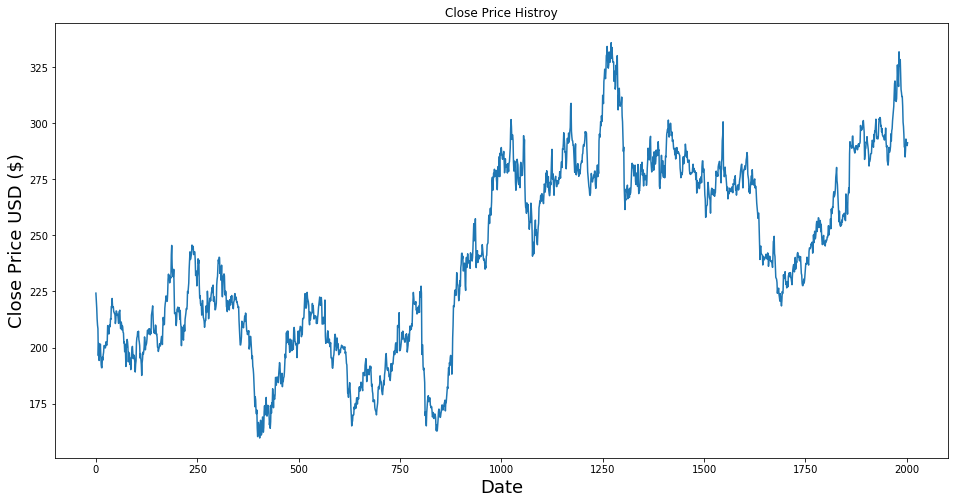

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price Histroy')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
data=dat.drop(['Date','Adj Close','Volume'],axis=1)

In [18]:
min_value=data['Close'].min()
min_value

159.625

In [19]:
max_value=data['Close'].max()
max_value

335.975006

In [20]:
data.head()

,Open,High,Low,Close
0,222.600006,225.300003,220.199997,224.250000
1,222.000000,224.565002,218.699997,221.235001
2,222.000000,225.899994,216.750000,217.619995
3,217.500000,221.699997,211.889999,212.744995
4,209.699997,212.699997,208.500000,209.970001


In [21]:
data.shape

(2003, 4)

In [22]:
bins=[150,200,250,300,350]
group_names=['150-200','201-250','251-300','301-350']
data['Close_bins']=pd.cut(data['Close'],bins,labels=group_names,include_lowest=True)

In [23]:
data.head()

,Open,High,Low,Close,Close_bins
0,222.600006,225.300003,220.199997,224.250000,201-250
1,222.000000,224.565002,218.699997,221.235001,201-250
2,222.000000,225.899994,216.750000,217.619995,201-250
3,217.500000,221.699997,211.889999,212.744995,201-250
4,209.699997,212.699997,208.500000,209.970001,201-250


In [24]:
data=data.drop("Close", axis=1)

In [25]:
data.head()

,Open,High,Low,Close_bins
0,222.600006,225.300003,220.199997,201-250
1,222.000000,224.565002,218.699997,201-250
2,222.000000,225.899994,216.750000,201-250
3,217.500000,221.699997,211.889999,201-250
4,209.699997,212.699997,208.500000,201-250


In [26]:
X=data.drop("Close_bins", axis=1)
y=data["Close_bins"]

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [29]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

     150-200       0.98      0.85      0.91        75
     201-250       0.92      0.99      0.95       154
     251-300       0.95      0.99      0.97       152
     301-350       1.00      0.65      0.79        20

   micro avg       0.95      0.95      0.95       401
   macro avg       0.96      0.87      0.91       401
weighted avg       0.95      0.95      0.94       401



In [32]:
print(confusion_matrix(y_test,pred))

[[ 64  11   0   0]
 [  1 152   1   0]
 [  0   2 150   0]
 [  0   0   7  13]]


In [33]:
print(accuracy_score(y_test, pred))

0.9451371571072319


In [36]:
a=[[209,212,208]]
a=s.transform(a)
b=clf.predict(a)

In [37]:
b

array(['201-250'], dtype=object)